In [2]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget
import os
from scipy.signal import savgol_filter
from scipy.optimize import root
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm
from matplotlib import ticker

In [17]:
fontsize_legend = 20
fontsize_axes = 24
fontsize_ticks = 16
linewidth_all = 3
markersize_all = 8
size_extra = 4

figsize_whole = (6,5)
figsize_three = (15,5)
figsize_three_vert = (6, 13)
figsize_two = (10,5)
folder_out = 'data_processed'
exp_in = 'exp_results'

color_2folds = 'palevioletred'
color_3folds = 'firebrick'
color_4folds = 'steelblue'

def smooth_pv_data(pressure, window_len = 100):
    # window_len = 100
    poly_order = 2
    len_pressure, num_exp = np.shape(pressure)

    pressure_smooth = np.zeros((len_pressure, num_exp))

    for i in range(num_exp):
        pressure_smooth[:,i] = savgol_filter(pressure[:,i], window_len, poly_order)
    
    return pressure_smooth

def rescale_eigenvalue(eigenvalues_cur):
    return np.sign(eigenvalues_cur) * np.sqrt(np.abs(eigenvalues_cur)) * 1/(2*np.pi)

def highlight_mode(freq_all, initial_i, initial_j, num_samp):
    j_all = np.zeros(np.shape(freq_all)[0], dtype = int)
    i_all = np.arange(np.shape(freq_all)[0], dtype = int)
    j_all[initial_i[0]:initial_i[1] + 1] = initial_j
    cut_idx = initial_i[0] + np.arange(num_samp)

    for idx in range(num_samp):
        i_next = idx + initial_i[1] + 1
        i_cur = [i_next-2,i_next-1]
        j_cur = [j_all[i] for i in i_cur]

        vals_cur = np.array([freq_all[i,j] for i,j in zip(i_cur, j_cur)])
        val_new_est = vals_cur[-1] + np.diff(vals_cur)
        j_all[i_next] = np.argmin(np.abs(freq_all[i_next,:] - val_new_est))
    return (i_all, j_all, cut_idx)


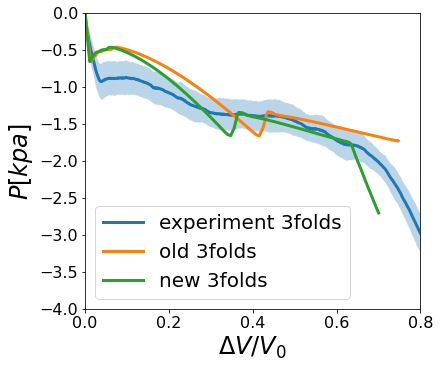

In [28]:
#3 folds
num_folds = 3
idx_new = 112
idx_old = 108
data_dir = 'data_out'
eps = -0.009

exp_res = np.load(f'{exp_in}/PV_{num_folds}folds_smoothed.npz')
v_new, p_new = np.loadtxt(f'{data_dir}/sim-long-{num_folds}folds-{idx_new}_pcav_cvol.txt', unpack = True)
v_old, p_old = np.loadtxt(f'{data_dir}/sim-long-{num_folds}folds-{idx_old}_pcav_cvol.txt', unpack = True)

fig, ax = plt.subplots( figsize = figsize_whole, constrained_layout = True)

ax.plot(exp_res['vol_norm'] + eps, exp_res['pressure_mean'], linewidth = 3, label = f'experiment {num_folds}folds')
ax.fill_between(exp_res['vol_norm'] + eps, exp_res['pressure_mean'] - exp_res['pressure_std'], exp_res['pressure_mean'] + exp_res['pressure_std'], alpha = 0.3)
ax.plot((v_old[0] - v_old)/v_old[0], 1e3 * p_old, linewidth = linewidth_all, label = f'old {num_folds}folds')
ax.plot((v_new[0] - v_new)/v_new[0], 1e3 * p_new, linewidth = linewidth_all, label = f'new {num_folds}folds')

ax.set_xlabel('$\Delta V / V_0$', fontsize = fontsize_axes)
ax.set_ylabel('$P [kpa]$', fontsize = fontsize_axes)
ax.tick_params(labelsize = fontsize_ticks)
ax.legend(fontsize = fontsize_legend)

ax.set_xlim(0,0.8)
ax.set_ylim(-4,0)

fig.savefig(f'{folder_out}/cvol_testing-{num_folds}folds.png')



volume cvol: 5652.10205078125
volume theory: 5654.8667764616275


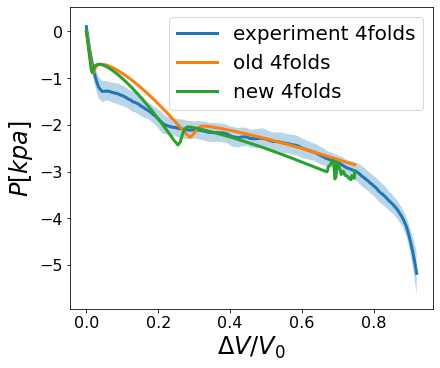

In [29]:
#3 folds
num_folds = 4
idx_new = 113
idx_old = 109
data_dir = 'data_out'
eps = 0.0

exp_res = np.load(f'{exp_in}/PV_{num_folds}folds_smoothed.npz')
v_new, p_new = np.loadtxt(f'{data_dir}/sim-long-{num_folds}folds-{idx_new}_pcav_cvol.txt', unpack = True)
v_old, p_old = np.loadtxt(f'{data_dir}/sim-long-{num_folds}folds-{idx_old}_pcav_cvol.txt', unpack = True)

fig, ax = plt.subplots( figsize = figsize_whole, constrained_layout = True)

ax.plot(exp_res['vol_norm'] + eps, exp_res['pressure_mean'], linewidth = 3, label = f'experiment {num_folds}folds')
ax.fill_between(exp_res['vol_norm'] + eps, exp_res['pressure_mean'] - exp_res['pressure_std'], exp_res['pressure_mean'] + exp_res['pressure_std'], alpha = 0.3)
ax.plot((v_old[0] - v_old)/v_old[0], 1e3 * p_old, linewidth = linewidth_all, label = f'old {num_folds}folds')
ax.plot((v_new[0] - v_new)/v_new[0], 1e3 * p_new, linewidth = linewidth_all, label = f'new {num_folds}folds')

ax.set_xlabel('$\Delta V / V_0$', fontsize = fontsize_axes)
ax.set_ylabel('$P [kpa]$', fontsize = fontsize_axes)
ax.tick_params(labelsize = fontsize_ticks)
ax.legend(fontsize = fontsize_legend)

fig.savefig(f'{folder_out}/cvol_testing-{num_folds}folds.png')

print(f'volume cvol: {v_new[0]}')
print(f'volume theory: {18*10*10*np.pi}')




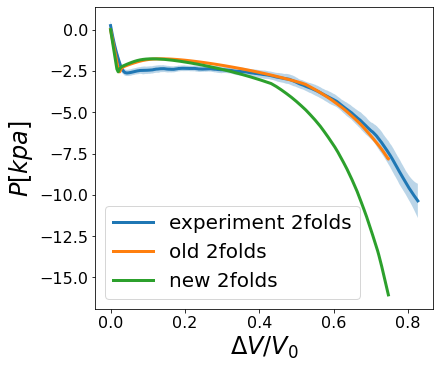

In [30]:
#3 folds
num_folds = 2
idx_new = 114
idx_old = 110
data_dir = 'data_out'
eps = 0.0

exp_res = np.load(f'{exp_in}/PV_{num_folds}folds_smoothed.npz')
v_new, p_new = np.loadtxt(f'{data_dir}/sim-long-{num_folds}folds-{idx_new}_pcav_cvol.txt', unpack = True)
v_old, p_old = np.loadtxt(f'{data_dir}/sim-long-{num_folds}folds-{idx_old}_pcav_cvol.txt', unpack = True)

fig, ax = plt.subplots( figsize = figsize_whole, constrained_layout = True)

ax.plot(exp_res['vol_norm'] + eps, exp_res['pressure_mean'], linewidth = 3, label = f'experiment {num_folds}folds')
ax.fill_between(exp_res['vol_norm'] + eps, exp_res['pressure_mean'] - exp_res['pressure_std'], exp_res['pressure_mean'] + exp_res['pressure_std'], alpha = 0.3)
ax.plot((v_old[0] - v_old)/v_old[0], 1e3 * p_old, linewidth = linewidth_all, label = f'old {num_folds}folds')
ax.plot((v_new[0] - v_new)/v_new[0], 1e3 * p_new, linewidth = linewidth_all, label = f'new {num_folds}folds')

ax.set_xlabel('$\Delta V / V_0$', fontsize = fontsize_axes)
ax.set_ylabel('$P [kpa]$', fontsize = fontsize_axes)
ax.tick_params(labelsize = fontsize_ticks)
ax.legend(fontsize = fontsize_legend)

fig.savefig(f'{folder_out}/cvol_testing-{num_folds}folds.png')

